# Proyecto 3: Modelo de variables estocasticas con velocidad de arrastre

## Modelo de velocidad
Generamos un modelo con la funcion de velocidad estocastica adimensional con arrastre 2000 veces
Graficamos la funcion de valores medios con la desviacion estandar de los datos
Graficamos la funcion de media teorica con la desviacion estandar teorica
Calculamos coeficientes de correlacion



In [1]:
# instalamos e importamos las librerias necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import math

In [2]:
# Definimos el intervalo de tiempo sobre el que evaluaremos las funciones
t_1 = 0
t_2 = 10
Ttp = 400
dt = (t_2-t_1)/Ttp
t = np.linspace(t_1, t_2, Ttp)

# Definimos la velocidad inicial y la velocidad de arrastre
vi = 10
vd = 3

In [3]:
# Creamos un diccionario para guardar las funciones de velocidad

F_v = {'función'+str(k+1):0 for k in range (2000)}

Text(0.5, 0, 'Tiempo')

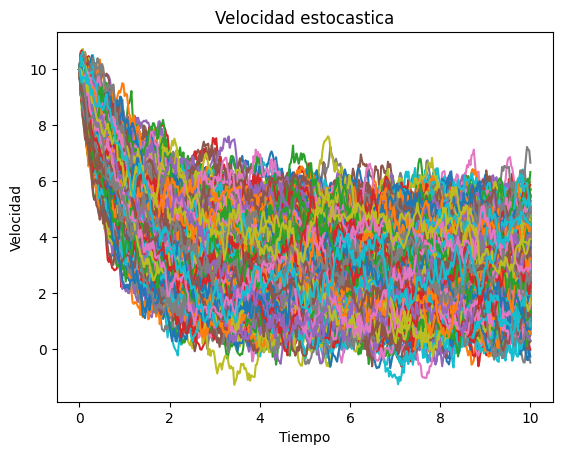

In [4]:
#Llenamos el diccionario con los valores generados de cada una de las 2000 funciones
for j in range (2000):
  V = np.zeros(400, dtype=np.float32)
  n = 0
  for i in t:
    if n == 0:
      V[n]= vi
    else:
      V[n]=V[n-1]*math.exp(-1*dt) + vd*(1-math.exp(-1*dt)) + math.sqrt(1-math.exp(-2*dt))*rnd.gauss(mu=0, sigma=1)
    n=n+1
  F_v['función'+str(j+1)]=V
  plt.plot(t, V)
plt.title('Velocidad estocastica')
plt.ylabel('Velocidad')
plt.xlabel('Tiempo')

In [5]:
# Convertimos el diccionario en un dataframe

Funv = pd.DataFrame(F_v)

In [6]:
# Creamos variables para guardar la media y varianza teórica
mTv = np.zeros(400, dtype=float)
varTv = np.zeros(400, dtype=float)

i = 0
m=0
for m in t:
    mTv[i] = vd + (7)*math.exp(-m)
    varTv[i] = (1-math.exp(-2*m))
    i = i+1
desTv = (varTv)**(1/2)

In [7]:
#Calculamos la función de valores medios y la desviación estándar simulada
mEv = np.zeros(400, dtype=float)
desEv = np.zeros(400, dtype=float)
for m in range (400):
  mEv[m] = np.mean(Funv.iloc[m, :])
  desEv[m] = np.std(Funv.iloc[m, :])

varEv = desEv**2 

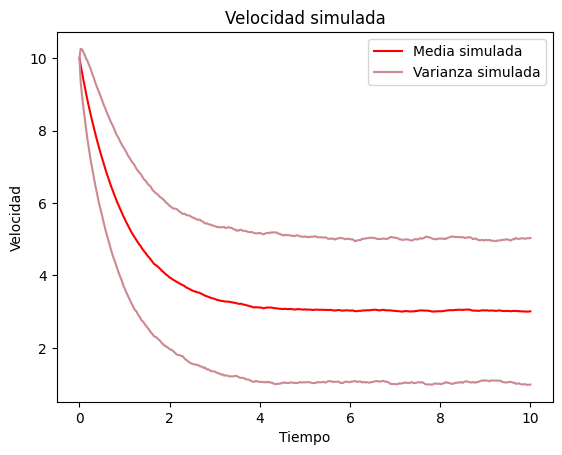

In [8]:
# Graficamos las medias y varianzas simuladas


plt.plot(t, mEv, color = 'red', label = 'Media simulada')

plt.plot(t, mEv + 2*desEv, color = '#cc8991', label = 'Varianza simulada')
plt.plot(t, mEv - 2*desEv, color = '#cc8991')
plt.title('Velocidad simulada')
plt.ylabel('Velocidad')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

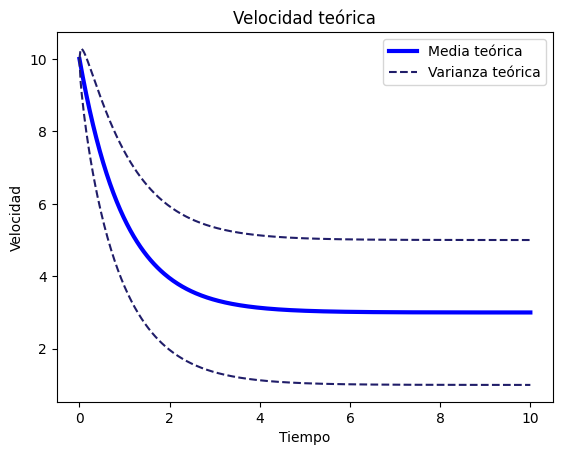

In [9]:
# Graficamos las medias y varianzas teoricas

plt.plot(t, mTv, color = 'blue', linewidth=3 , label = 'Media teórica')

plt.plot(t, mTv + 2*desTv, color = '#201d69', linestyle = '--', label = 'Varianza teórica')
plt.plot(t, mTv - 2*desTv, color = '#201d69', linestyle = '--')

plt.title('Velocidad teórica')
plt.ylabel('Velocidad')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

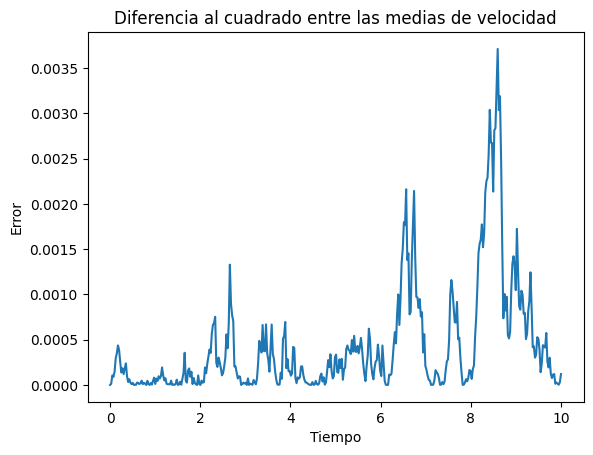

In [35]:
# Realizamos una gráfica con la diferencia al cuadrado de las medias para observar el error entre las dos mediciones
ev = (mTv-mEv)**2

plt.plot(t, ev)

plt.title('Diferencia al cuadrado entre las medias de velocidad')
plt.ylabel('Error')
plt.xlabel('Tiempo')
plt.show()
 

In [10]:
# Calculamos la matriz de correlación normalizada

Matrizv = Funv.to_numpy()
coffnv = np.corrcoef(Matrizv)

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


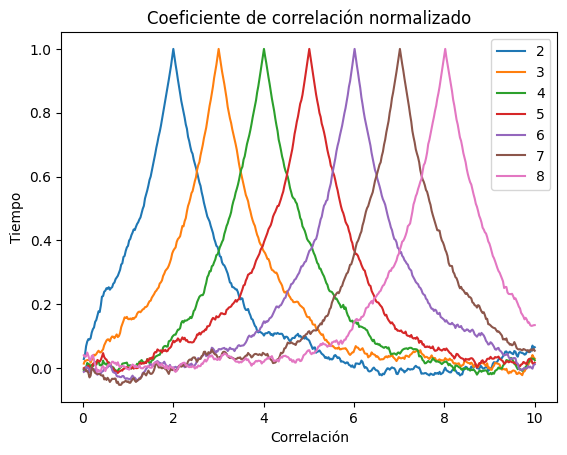

In [11]:
# Graficamos la correlación respecto a n tiempos

plt.plot(t, coffnv[80, :], label = '2')
plt.plot(t, coffnv[120, :], label = '3')
plt.plot(t, coffnv[160, :], label = '4')
plt.plot(t, coffnv[200, :], label = '5')
plt.plot(t, coffnv[240, :], label = '6')
plt.plot(t, coffnv[280, :], label = '7')
plt.plot(t, coffnv[320, :], label = '8')

plt.title('Coeficiente de correlación normalizado')
plt.xlabel('Correlación')
plt.ylabel('Tiempo')
plt.legend()

## Modelo de posición
Generamos un modelo con la funcion de posicion estocastica adimensional con arrastre 2000 veces
Graficamos la funcion de valores medios con la desviacion estandar de los datos
Graficamos la funcion de media teorica con la desviacion estandar teorica
Calculamos coeficientes de correlacion


In [12]:
# Creamos un diccionario para guardar las funciones de posicion

F_x = {'función'+str(k+1):0 for k in range (2000)}

In [13]:
# Definimos el coeficiente a0

def a_0(n):
    
    a0 = X[n-1] + V[n-1]*(1-math.exp(-dt))+vd*(dt+math.exp(-dt)-1)

    return a0 

In [14]:
# Definimos el coeficiente a1

a1_1 = 1 - 2*math.exp(-dt) + math.exp(-2*dt)
a1_2 = math.sqrt(1-math.exp(-2*dt))
a1 = a1_1 / a1_2

In [22]:
# Definimos el coeficiente a2**2

a2_2 = 2*dt - 4*(1-math.exp(-dt))+(1-math.exp(-2*dt))-a1**2

Text(0.5, 0, 'Tiempo')

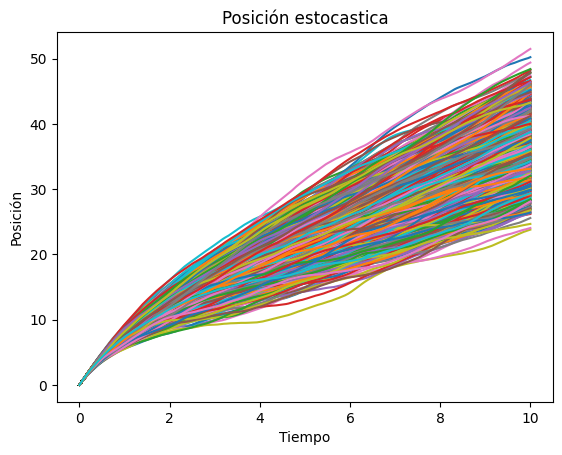

In [24]:
#Llenamos el diccionario con los valores generados de cada una de las 2000 funciones
for j in range (2000):
  V = np.zeros(400, dtype=np.float32)
  X = np.zeros(400, dtype=np.float32)
  n = 0
  for i in t:
    if n == 0:
      V[n]= vi
      X[n]= 0
    else:
      V[n]= V[n-1]*math.exp(-1*dt) + vd*(1-math.exp(-1*dt)) + math.sqrt(1-math.exp(-2*dt))*rnd.gauss(mu=0, sigma=1)
      X[n]= a_0(n)+a1*rnd.gauss(mu=0, sigma=1)+math.sqrt(a2_2)*rnd.gauss(mu=0, sigma=1)
    n=n+1
  F_x['función'+str(j+1)]=X
  plt.plot(t, X)
plt.title('Posición estocastica')
plt.ylabel('Posición')
plt.xlabel('Tiempo')

In [25]:
# Convertimos el diccionario en un dataframe

Funx = pd.DataFrame(F_x)

In [26]:
# Creamos variables para guardar la media y varianza teórica
mTx = np.zeros(400, dtype=float)
varTx = np.zeros(400, dtype=float)

i = 0
m = 0
for m in t:
    mTx[i] = vi*(1-math.exp(-m))+vd*(m+math.exp(-m)-1)
    varTx[i] = 2*m - 4*(1-math.exp(-m))+(1-math.exp(-2*m))
    i = i+1
desTx = (varTx)**(1/2)

In [27]:
#Calculamos la función de valores medios y la desviación estándar simulada
mEx = np.zeros(400, dtype=float)
desEx = np.zeros(400, dtype=float)
for m in range (400):
  mEx[m] = np.mean(Funx.iloc[m, :])
  desEx[m] = np.std(Funx.iloc[m, :])

varEx = desEx**2 

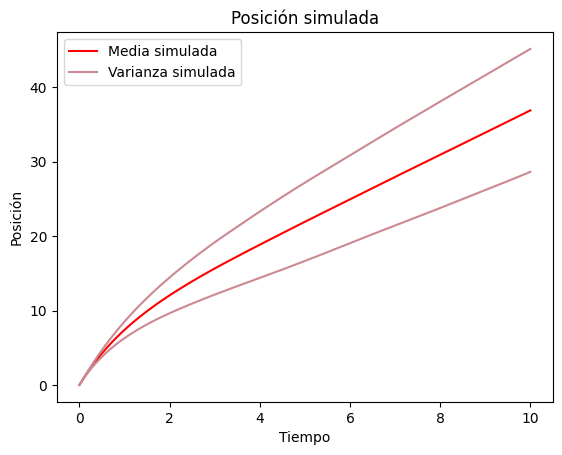

In [28]:
# Graficamos las medias y varianzas simuladas


plt.plot(t, mEx, color = 'red', label = 'Media simulada')

plt.plot(t, mEx + 2*desEx, color = '#cc8991', label = 'Varianza simulada')
plt.plot(t, mEx - 2*desEx, color = '#cc8991')
plt.title('Posición simulada')
plt.ylabel('Posición')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

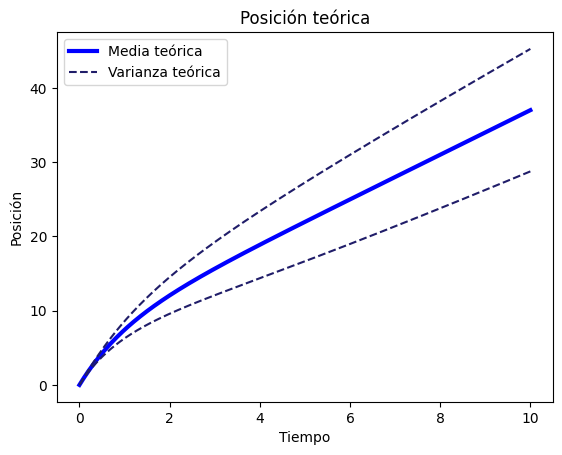

In [29]:
# Graficamos las medias y varianzas teoricas

plt.plot(t, mTx, color = 'blue', linewidth=3 , label = 'Media teórica')

plt.plot(t, mTx + 2*desTx, color = '#201d69', linestyle = '--', label = 'Varianza teórica')
plt.plot(t, mTx - 2*desTx, color = '#201d69', linestyle = '--')

plt.title('Posición teórica')
plt.ylabel('Posición')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

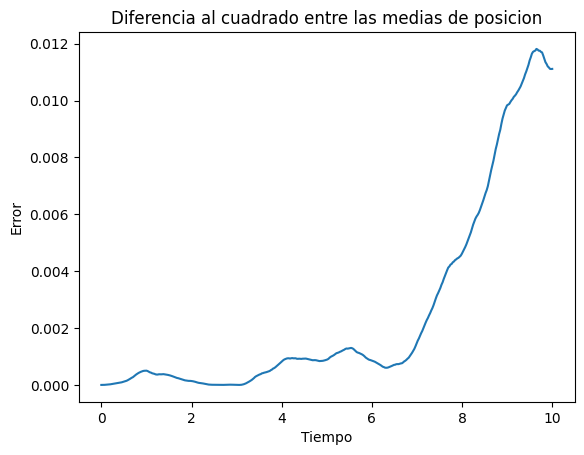

In [36]:
# Realizamos una gráfica con la diferencia al cuadrado de las medias para observar el error entre las dos mediciones
ex = (mTx-mEx)**2

plt.plot(t, ex)

plt.title('Diferencia al cuadrado entre las medias de posicion')
plt.ylabel('Error')
plt.xlabel('Tiempo')
plt.show()
 

In [30]:
# Calculamos la matriz de correlación normalizada

Matrizv = Funv.to_numpy()
coffnv = np.corrcoef(Matrizv)

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


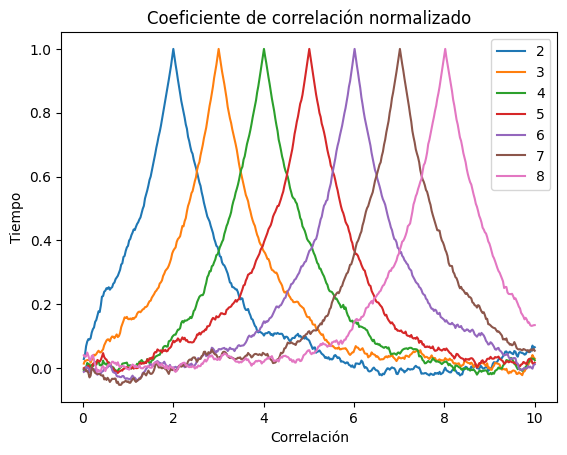

In [31]:
# Graficamos la correlación respecto a n tiempos

plt.plot(t, coffnv[80, :], label = '2')
plt.plot(t, coffnv[120, :], label = '3')
plt.plot(t, coffnv[160, :], label = '4')
plt.plot(t, coffnv[200, :], label = '5')
plt.plot(t, coffnv[240, :], label = '6')
plt.plot(t, coffnv[280, :], label = '7')
plt.plot(t, coffnv[320, :], label = '8')

plt.title('Coeficiente de correlación normalizado')
plt.xlabel('Correlación')
plt.ylabel('Tiempo')
plt.legend()